In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# simulating the dataset
dataset=pd.read_csv('Salaray_data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
X.shape

(30, 1)

In [6]:
y.shape #1-d array not 2d array while X is 2d array

(30,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.predict([[3.2],[3.44],[8]])

array([ 56042.3112591 ,  58344.07892647, 102077.66460654])

In [11]:
y_pred=lr.predict(X_test)
y_pred

array([108791.15363638, 117422.78238902,  60837.66056612, 124136.27141886,
        93446.0358539 ,  72346.49890298,  56042.3112591 , 116463.71252762,
        68510.21945736,  37819.9838924 ])

In [13]:
# y=mx+c here m is coeffient and c is intercpet
m=lr.coef_
m

array([9590.69861405])

In [14]:
c=lr.intercept_
c

np.float64(25352.075694133287)

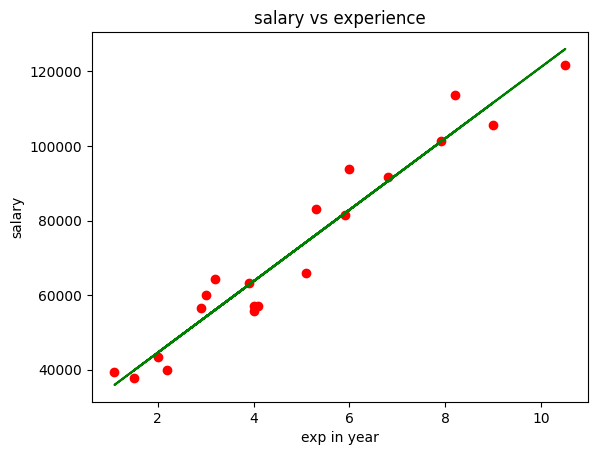

In [17]:
import matplotlib.pyplot  as plt
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='green')
plt.title("salary vs experience")
plt.xlabel("exp in year")
plt.ylabel("salary")
plt.show()



[]

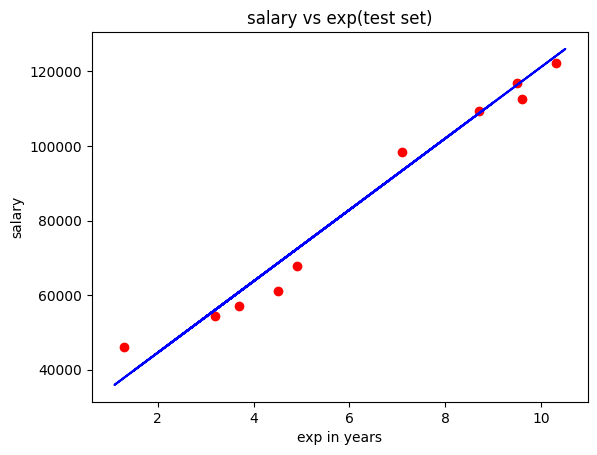

In [19]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title("salary vs exp(test set)")
plt.xlabel("exp in years")
plt.ylabel("salary")
plt.plot()

In [23]:
# preformance measuree
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_pred,y_test))
r2=(r2_score(y_pred,y_test))

0.9746247284572834


In [ ]:
# adujusted r2 sqaure
1-((1-r2))

working on melborne dataset

In [ ]:
dataset=pd.read_csv("Melbourne_housing_FULL - Melbourne_housing_FULL.csv")


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
dataset.head()
dataset.shape

(34857, 21)

In [29]:
#selecting limited cols to predict
cols=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount',
     'Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize',
     'BuildingArea','Price']
dataset=dataset[cols]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
dataset.isnull().sum() #  to find out the sum the of null values 

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [36]:
colstofill=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[colstofill]=dataset[colstofill].fillna(0)
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())

In [37]:
dataset.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21115
Price             7610
dtype: int64

In [38]:
dataset.dropna(inplace=True)

In [39]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [41]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [48]:
x=dataset.drop('Price',axis=1)
y=dataset['Price']

In [44]:
type(X)

pandas.core.frame.DataFrame

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
# lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=50,max_iter=100,tol=0.1)
lasso.fit(xtrain,ytrain)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [52]:
lasso.score(xtest,ytest)

0.4012667012807387

In [54]:
lasso.score(xtrain,ytrain)


0.7234646341079514